In [1]:
from scripts.subscripts.SYNCLUS import SYNCLUS
import numpy as np

%matplotlib inline

In [2]:
PTEXT_dissim = np.loadtxt("./data/PTEX_DTW_matrix.dat", dtype= np.float64, delimiter = ",")

In [3]:
from scripts.ClusterMetrics import silhouette_score_precomputed, calinski_harabasz_score_precomputed, davies_bouldin_score_precomputed

def GetClusteringMetrics(dissim, Labels):
    SH_score = silhouette_score_precomputed(dissim, Labels)
    CH_score = calinski_harabasz_score_precomputed(dissim, Labels)
    DB_score = davies_bouldin_score_precomputed(dissim, Labels)

    return (SH_score, CH_score, DB_score)

In [4]:
from matplotlib.pyplot import subplots, show

def VisualizeClusterMetrics(metrics_by_num):
    Figure, Subplot = subplots(3, 1, sharex="all", figsize = (7, 7))
    Figure.suptitle("SYNCLUS metrics")

    num_clusters = tuple(metrics_by_num.keys())
    SH, CH, DB = zip(*tuple(metrics_by_num.values()))

    Subplot[0].plot(num_clusters, SH, "-o")
    Subplot[1].plot(num_clusters, CH, "-o")
    Subplot[2].plot(num_clusters, DB, "-o")

    Subplot[2].set_xlabel("# of clusters")
    Subplot[0].set_ylabel("Silhouette Coefficient")
    Subplot[1].set_ylabel("Calinski-Harabasz Index")
    Subplot[2].set_ylabel("Davies-Bouldin Index")

    Figure.tight_layout()

    show()

In [5]:
metrics_by_clusters = dict()
num_iters = 250
num_reps = 50
num_clusters = tuple(range(2, 11))

for k in num_clusters:
    SYNCLUS_VTEC = SYNCLUS(PTEXT_dissim, K = k, iter = num_iters, reps = num_reps)
    Labels = SYNCLUS_VTEC.fit_predict()["end_clusters"]
    Metrics = GetClusteringMetrics(PTEXT_dissim, Labels)

    metrics_by_clusters[k] = Metrics

100%|██████████| 50/50 [00:29<00:00,  1.69it/s]


Best SYNCLUS at  1 with  2  clusters
Min, Quartiles, Max
244686.25, 244686.25, 449838.28, 537913.81, 602761.29


100%|██████████| 50/50 [00:36<00:00,  1.36it/s]


Best SYNCLUS at  14 with  3  clusters
Min, Quartiles, Max
139926.37, 221518.85, 238614.68, 322849.06, 587636.78


100%|██████████| 50/50 [01:23<00:00,  1.67s/it]


Best SYNCLUS at  18 with  4  clusters
Min, Quartiles, Max
123945.93, 126823.87, 134253.13, 229843.54, 565165.61


100%|██████████| 50/50 [01:30<00:00,  1.81s/it]


Best SYNCLUS at  13 with  5  clusters
Min, Quartiles, Max
111111.64, 119051.59, 123682.49, 179414.57, 258955.66


100%|██████████| 50/50 [02:12<00:00,  2.66s/it]


Best SYNCLUS at  14 with  6  clusters
Min, Quartiles, Max
101503.47, 108190.06, 113443.77, 125170.61, 229262.6


100%|██████████| 50/50 [02:21<00:00,  2.83s/it]


Best SYNCLUS at  16 with  7  clusters
Min, Quartiles, Max
96517.05, 103376.43, 108206.93, 124837.45, 313683.78


100%|██████████| 50/50 [02:36<00:00,  3.13s/it]


Best SYNCLUS at  39 with  8  clusters
Min, Quartiles, Max
93105.35, 96473.46, 101934.57, 110427.4, 225294.75


100%|██████████| 50/50 [02:46<00:00,  3.32s/it]


Best SYNCLUS at  27 with  9  clusters
Min, Quartiles, Max
89922.75, 92843.44, 98033.57, 116724.37, 202253.39


100%|██████████| 50/50 [02:44<00:00,  3.30s/it]


Best SYNCLUS at  1 with  10  clusters
Min, Quartiles, Max
85915.6, 88762.1, 94292.67, 102888.52, 210231.99


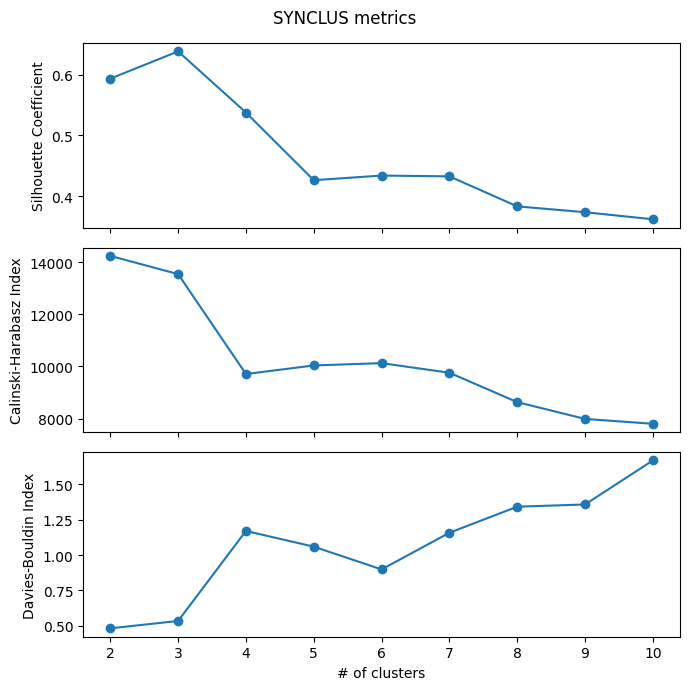

In [6]:
VisualizeClusterMetrics(metrics_by_clusters)

In [ ]:
BestLabelsSYNCLUS = SYNCLUS(PTEXT_dissim, K = 3, iter = num_iters, reps = num_reps).fit_predict()["end_clusters"]

np.savetxt("./data/PTEX_SYNCLUS_Labels.dat", BestLabelsSYNCLUS.reshape(BestLabelsSYNCLUS.size, 1), fmt = "%d")

100%|██████████| 50/50 [00:28<00:00,  1.74it/s]

Best SYNCLUS at  4 with  3  clusters
Min, Quartiles, Max
139926.37, 201931.41, 239950.18, 311039.49, 580997.64
